In [1]:
#install.packages("transformr")
library(readxl)
library(tidyverse)
library(transformr)
library(gganimate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
global.data <- read_excel("data.xlsx")
global.data.long <- global.data %>%
                    group_by(geoId) %>%
                    arrange(geoId, year, month, day) %>%
                    mutate(cumCases=cumsum(cases), cumDeaths=cumsum(deaths), smaCases=(cases+lag(cases, 1)+lag(cases, 2)+lag(cases, 3)+lag(cases, 4))/5) # %>%

In [3]:
plot.data <- global.data.long
plot.data <- plot.data%>% mutate(jCumCases=1)
plot.data <- plot.data%>% mutate(jCumCases=cumCases + (row_number()-1)* 0.00000001)
plot.data <- plot.data%>% mutate(jSmaCases=smaCases + (row_number()-1)* 0.00000001)
plot.data <- plot.data%>% filter(geoId=="CA"|geoId=="DE"|geoId=="CN"|geoId=="UK"|geoId=="FR"|geoId=="ES"|geoId=="IT"|geoId=="KR"|geoId=="US"|geoId=="JP")

In [15]:
p <- ggplot(plot.data, aes(x=cumCases, xmin=1, ymin=1)) +
    geom_line(aes(y=smaCases, colour=geoId)) +
    theme(legend.position="bottom") +
    scale_y_log10(labels = scales::comma) +
    scale_x_log10(labels = scales::comma) +
    labs(x="Cumulative Confirmed Cases", 
         y="New Confirmed Cases (5 day SMA)", 
         title="COVID-19 Confirmed New Cases against Cumulative Cases",
         #subtitle="27th of March 2020",
         caption="Ali Raheem 04 April 2020, data: ECDC (www.ecdc.europa.eu)") + 
    scale_colour_discrete(name="", labels=c("CA"="Canada","CN"="China", "DE"="Germany", "UK"="UK", "FR"="France", "ES"="Spain", "IT"="Italy", "KR"="South Korea", "US"="USA", "JP"="Japan"))

In [16]:
p + transition_time(as.numeric(as.POSIXct(DateRep, format="%Y-%m-%d"))) + labs(subtitle="Cumulative Cases: {frame_time}")

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
ERROR while rich displaying an object: Error in seq.default(range[1], range[2], length.out = nframes): 'from' must be a finite number

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”


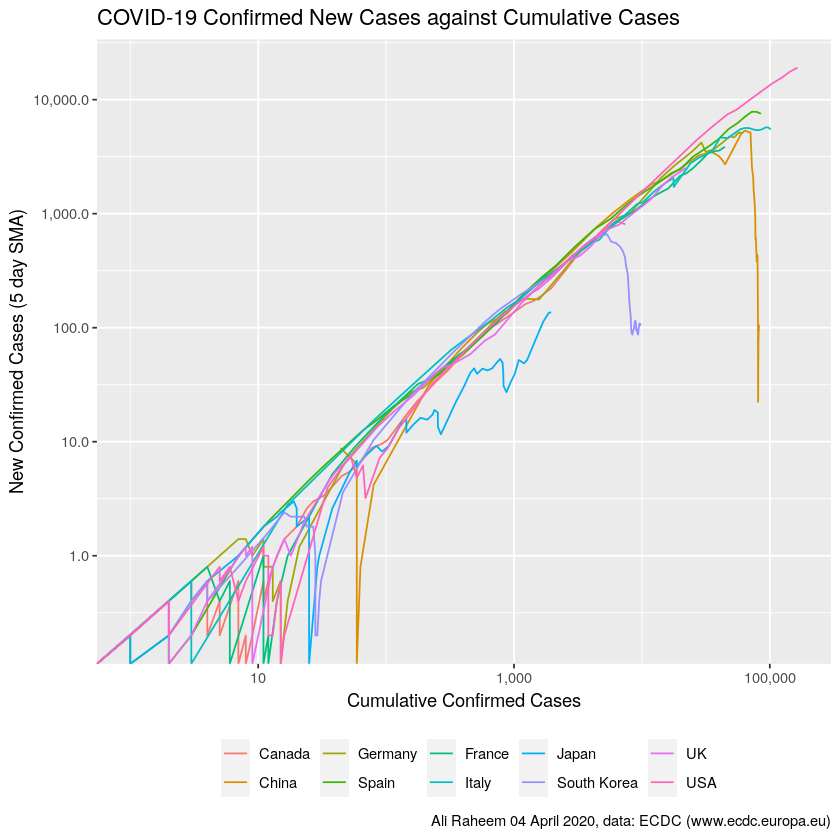

In [17]:
p

In [18]:
ggsave('COVID-19_loglog.png')

Saving 6.67 x 6.67 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 40 row(s) containing missing values (geom_path).”
